In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_excel('D:\dataset\Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
#Handling Dulpicates rows
df.duplicated().sum()

220

In [10]:
#There are 220 rows which are duplicates
df.drop_duplicates(inplace=True)

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


<AxesSubplot:>

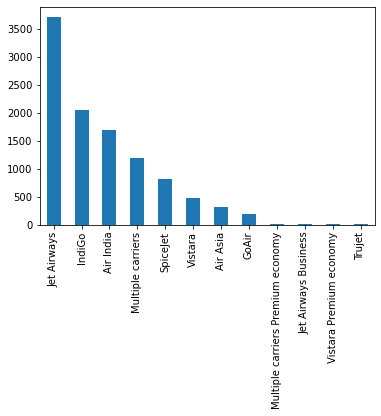

In [11]:
#Jet Airways, IndiGo, Air India, Multiple carriers are the top airlines which passengers prefer
print(df['Airline'].value_counts())
df['Airline'].value_counts().plot(kind='bar')

In [12]:
#These are the airlines which data ar very less compare to other airlines. Multiple carriers Premium economy, Jet Airways Business,Vistara Premium economy, Truejet

In [13]:
df['Duration'].value_counts()

2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
          ... 
30h 25m      1
30h 15m      1
42h 5m       1
28h 55m      1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

# EDA

From description we can see that Date_of_Journey is a object data type.Therefore, we have to convert this datatype into timestamp so as to use this coulmn properly for prediction.

For this we require pandas to_datetime to convert object data type to datetime dtype

.dt.day method will extract only day of that date

.dt.month method will extact only month of that date

In [14]:
#converting string dtype to datetime
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [15]:
df['Journey_day']=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day

In [16]:
df['Journey_month']=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month
df['Journey_year']=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.year

In [17]:
#Since we have converted Date_of_Journey coulmn into integers,Now we can drop as it is of no use
df.drop(['Date_of_Journey'],axis = 1, inplace=True)

In [18]:
#Departure time is when a plane leaves the gate.
#Similar to Date_of_Journey we can extract values from Dep_time

#Extracting Hours
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour

#Extracting Minutes
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

#Now we can Drop Dep_Time as it is of no use
df.drop(['Dep_Time'],axis = 1, inplace=True)


In [19]:
#Extracting time is the plane pulls up to the gate
#Similar to Date_of_Journey we can extract values from Arrival_Time


#Extracting Hours
df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour

#Extracting Minutes
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

#Now we can Drop Dep_Time as it is of no use
df.drop(['Arrival_Time'],axis = 1, inplace=True)

In [20]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [21]:
#Time taken by plane to reach destination is called Duration.
#It is the difference between Departure Time and Arrival Time

#Assigning and converting Duration column into list
duration = list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:  #check if duration conatins only hour or mins
        if 'h' in duration[i]:
            duration[i] = duration[i].strip()+' 0m'  #add 0 min
        else:
            duration[i] = '0h ' +duration[i]
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))  #Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1]))  #Extract hours from duration

In [22]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [23]:
df.drop(['Duration'],axis=1,inplace=True)

In [24]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [25]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,2019,11,30,14,10,2,40


In [26]:
import datetime
import pandas as pd
week_day=[]
# Loop over each row of the dataframe using the iterrows method
for i, row in df.iterrows():
    # Combine the year, month and day columns into a single integer
    ymd = row['Journey_year']*10000 + row['Journey_month']*100 + row['Journey_day']
    # Convert the integer to a datetime.datetime object using the to_datetime function and specifying the format
    dt = pd.to_datetime(ymd, format='%Y%m%d')
    # Extract the date part of the datetime object using the date method
    d = dt.date()
    # Format the date as a weekday name using the strftime method and the %a directive
    w = d.strftime('%a')
    # Append the weekday name to the week_day list
    week_day.append(w)

In [27]:
df['week_day']=week_day

In [28]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,week_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,Sun
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,Sat
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,Fri
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,Thu
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,Thu


# Handling the Categorical Data

one can find many ways to handle categorical data.Some of the categorical data are:

    1. Nominal data -> data are not in any order -> OneHotEncoder is used in this case
    2. Ordinal data -> data are in order -> LabelEncoder is used in this case

In [29]:
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

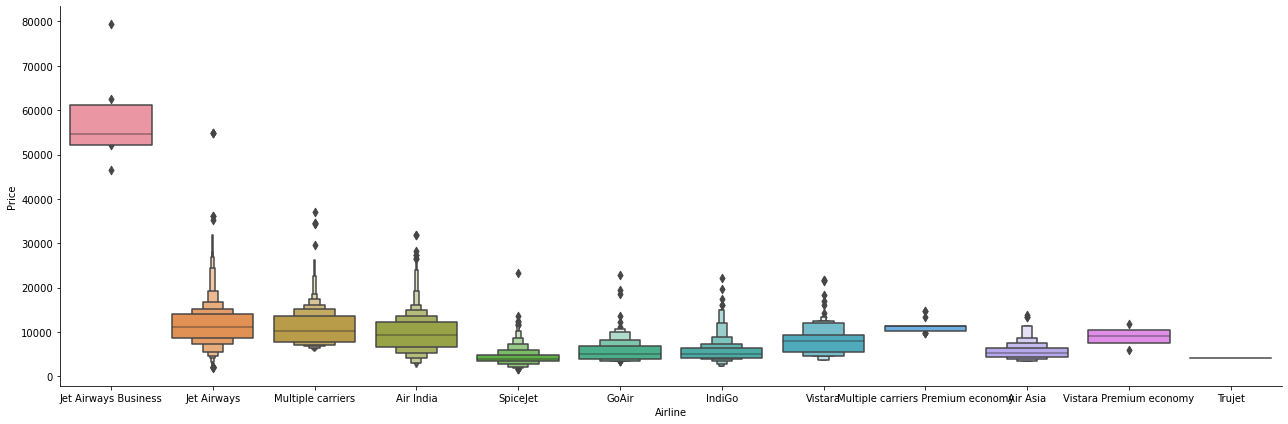

In [30]:
#Airline vs Price
sns.catplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [31]:
#As Airline and week_day is Nominal Categorical data we will perform OneHotEncoding
Airline=df[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()
Week_day=df[["week_day"]]
Week_day= pd.get_dummies(Week_day,drop_first=True)
Week_day.head()

,week_day_Mon,week_day_Sat,week_day_Sun,week_day_Thu,week_day_Tue,week_day_Wed
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [32]:
df["Source"].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

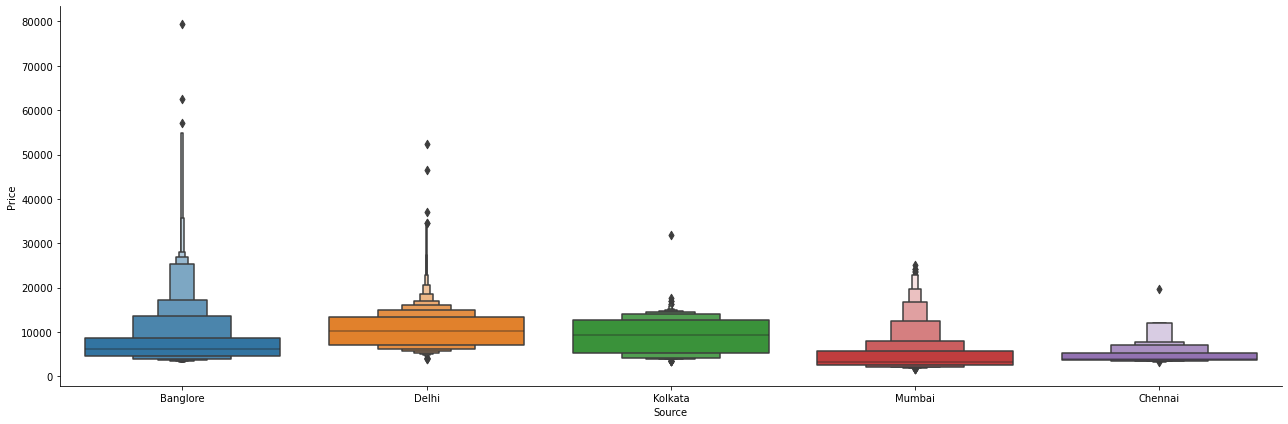

In [33]:
#Source VS Price
sns.catplot(y="Price",x="Source",data=df.sort_values("Price",ascending=False),kind='boxen',height=6,aspect=3)

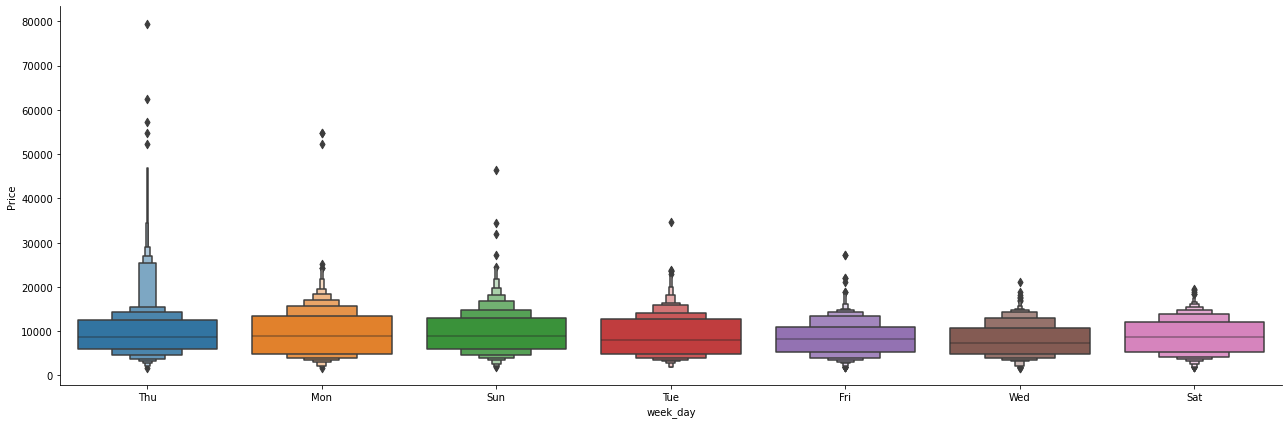

In [34]:
#week_day VS Price
sns.catplot(y="Price",x="week_day",data=df.sort_values("Price",ascending=False),kind='boxen',height=6,aspect=3)

In [35]:
#As Source is Nominal Categorical data we will perform OneHotEncoding

Source=df[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [36]:
df['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [37]:
#As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination=df[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [38]:
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [39]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,week_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,2019,22,20,1,10,2,50,Sun
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,2019,5,50,13,15,7,25,Sat
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,2019,9,25,4,25,19,0,Fri
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,2019,18,5,23,30,5,25,Thu
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,3,1,2019,16,50,21,35,4,45,Thu


In [40]:
df["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [41]:
#As atleast 80% of Additional_Info value is No info so we can remove it
df.drop("Additional_Info",axis=1,inplace=True)

In [42]:
df.drop('Route',axis=1,inplace=True)

In [43]:
df_train=pd.concat([df,Airline,Source,Destination,Week_day],axis=1)

In [44]:
df_train

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,week_day_Mon,week_day_Sat,week_day_Sun,week_day_Thu,week_day_Tue,week_day_Wed
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,...,0,0,0,1,0,0,1,0,0,0
1,Air India,Kolkata,Banglore,2,7662,5,1,2019,5,50,...,0,0,0,0,0,1,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,2019,9,25,...,0,0,0,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,2019,18,5,...,0,0,0,0,0,0,0,1,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,2019,16,50,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,4,9,2019,19,55,...,0,0,0,0,0,0,0,0,0,1
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,...,0,0,0,0,0,1,0,0,0,0
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,...,1,0,0,0,0,1,0,0,0,0
10681,Vistara,Banglore,New Delhi,0,12648,3,1,2019,11,30,...,0,0,0,1,0,0,0,1,0,0


In [45]:
df_train.drop(['Airline',"Destination",'Source','week_day'],axis=1,inplace=True)

In [46]:
df_train.shape

(10462, 37)

# Test set

In [47]:
df1=pd.read_excel('D:\dataset\Test_set.xlsx')

In [48]:
df1.shape

(2671, 10)

In [49]:
df1['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [50]:
df1.dropna(inplace=True)
#Handling Dulpicates rows
#df1.duplicated().sum()
#There are 220 rows which are duplicates
#df1.drop_duplicates(inplace=True)

In [51]:
#converting string dtype to datetime
df1['Date_of_Journey']=pd.to_datetime(df1['Date_of_Journey'])
df1['Journey_day']=pd.to_datetime(df1.Date_of_Journey,format="%d/%m/%Y").dt.day
df1['Journey_month']=pd.to_datetime(df1.Date_of_Journey,format="%d/%m/%Y").dt.month
df1['Journey_year']=pd.to_datetime(df1.Date_of_Journey,format="%d/%m/%Y").dt.year
#Since we have converted Date_of_Journey coulmn into integers,Now we can drop as it is of no use
df1.drop(['Date_of_Journey'],axis = 1, inplace=True)
#Departure time is when a plane leaves the gate.
#Similar to Date_of_Journey we can extract values from Dep_time

#Extracting Hours
df1['Dep_hour']=pd.to_datetime(df1['Dep_Time']).dt.hour

#Extracting Minutes
df1['Dep_min']=pd.to_datetime(df1['Dep_Time']).dt.minute

#Now we can Drop Dep_Time as it is of no use
df1.drop(['Dep_Time'],axis = 1, inplace=True)
#Extracting time is the plane pulls up to the gate
#Similar to Date_of_Journey we can extract values from Arrival_Time


#Extracting Hours
df1['Arrival_hour']=pd.to_datetime(df1['Arrival_Time']).dt.hour

#Extracting Minutes
df1['Arrival_min']=pd.to_datetime(df1['Arrival_Time']).dt.minute

#Now we can Drop Dep_Time as it is of no use
df1.drop(['Arrival_Time'],axis = 1, inplace=True)


In [52]:
#Time taken by plane to reach destination is called Duration.
#It is the difference between Departure Time and Arrival Time

#Assigning and converting Duration column into list
duration = list(df1['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:  #check if duration conatins only hour or mins
        if 'h' in duration[i]:
            duration[i] = duration[i].strip()+' 0m'  #add 0 min
        else:
            duration[i] = '0h ' +duration[i]
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))  #Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1]))  #Extract hours from duration
df1["Duration_hours"] = duration_hours
df1["Duration_mins"] = duration_mins
df1.drop(['Duration'],axis=1,inplace=True)

In [53]:
import datetime
import pandas as pd
week_day=[]
# Loop over each row of the dataframe using the iterrows method
for i, row in df1.iterrows():
    # Combine the year, month and day columns into a single integer
    ymd = row['Journey_year']*10000 + row['Journey_month']*100 + row['Journey_day']
    # Convert the integer to a datetime.datetime object using the to_datetime function and specifying the format
    dt = pd.to_datetime(ymd, format='%Y%m%d')
    # Extract the date part of the datetime object using the date method
    d = dt.date()
    # Format the date as a weekday name using the strftime method and the %a directive
    w = d.strftime('%a')
    # Append the weekday name to the week_day list
    week_day.append(w)
df1['week_day']=week_day

In [54]:
#As Airline and week_day is Nominal Categorical data we will perform OneHotEncoding
Airline=df1[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()
Week_day=df1[["week_day"]]
Week_day= pd.get_dummies(Week_day,drop_first=True)
Week_day.head()

#As Source is Nominal Categorical data we will perform OneHotEncoding

Source=df1[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

#As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination=df1[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

df1.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

#As atleast 80% of Additional_Info value is No info so we can remove it
df1.drop("Additional_Info",axis=1,inplace=True)

df1.drop('Route',axis=1,inplace=True)

df_test=pd.concat([df1,Airline,Source,Destination,Week_day],axis=1)

df_test.drop(['Airline',"Destination",'Source','week_day'],axis=1,inplace=True)

In [55]:
df_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Journey_year',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'week_day_Mon',
       'week_day_Sat', 'week_day_Sun', 'week_day_Thu', 'week_day_Tue',
       'week_day_Wed'],
      dtype='object')

In [56]:
df_test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Journey_year',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'week_day_Mon', 'week_day_Sat', 'week_day_Sun',
       'week_day_Thu', 'week_day_Tue', 'week_day_Wed'],
      dtype='object')

# Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.

Following are some of the feature selection methods.

1.heatmap
2.feature_importance_
3.SelectKBest

In [58]:
df_train.shape

(10462, 37)

In [59]:
df_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Journey_year',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'week_day_Mon',
       'week_day_Sat', 'week_day_Sun', 'week_day_Thu', 'week_day_Tue',
       'week_day_Wed'],
      dtype='object')

In [60]:
X=df_train.loc[:,['Total_Stops','Journey_day', 'Journey_month', 'Journey_year',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'week_day_Mon',
       'week_day_Sat', 'week_day_Sun', 'week_day_Thu', 'week_day_Tue',
       'week_day_Wed']]
X.head()

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,week_day_Mon,week_day_Sat,week_day_Sun,week_day_Thu,week_day_Tue,week_day_Wed
0,0,24,3,2019,22,20,1,10,2,50,...,0,0,0,1,0,0,1,0,0,0
1,2,5,1,2019,5,50,13,15,7,25,...,0,0,0,0,0,1,0,0,0,0
2,2,6,9,2019,9,25,4,25,19,0,...,0,0,0,0,0,0,0,0,0,0
3,1,5,12,2019,18,5,23,30,5,25,...,0,0,0,0,0,0,0,1,0,0
4,1,3,1,2019,16,50,21,35,4,45,...,0,0,0,1,0,0,0,1,0,0


In [64]:
y=df_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

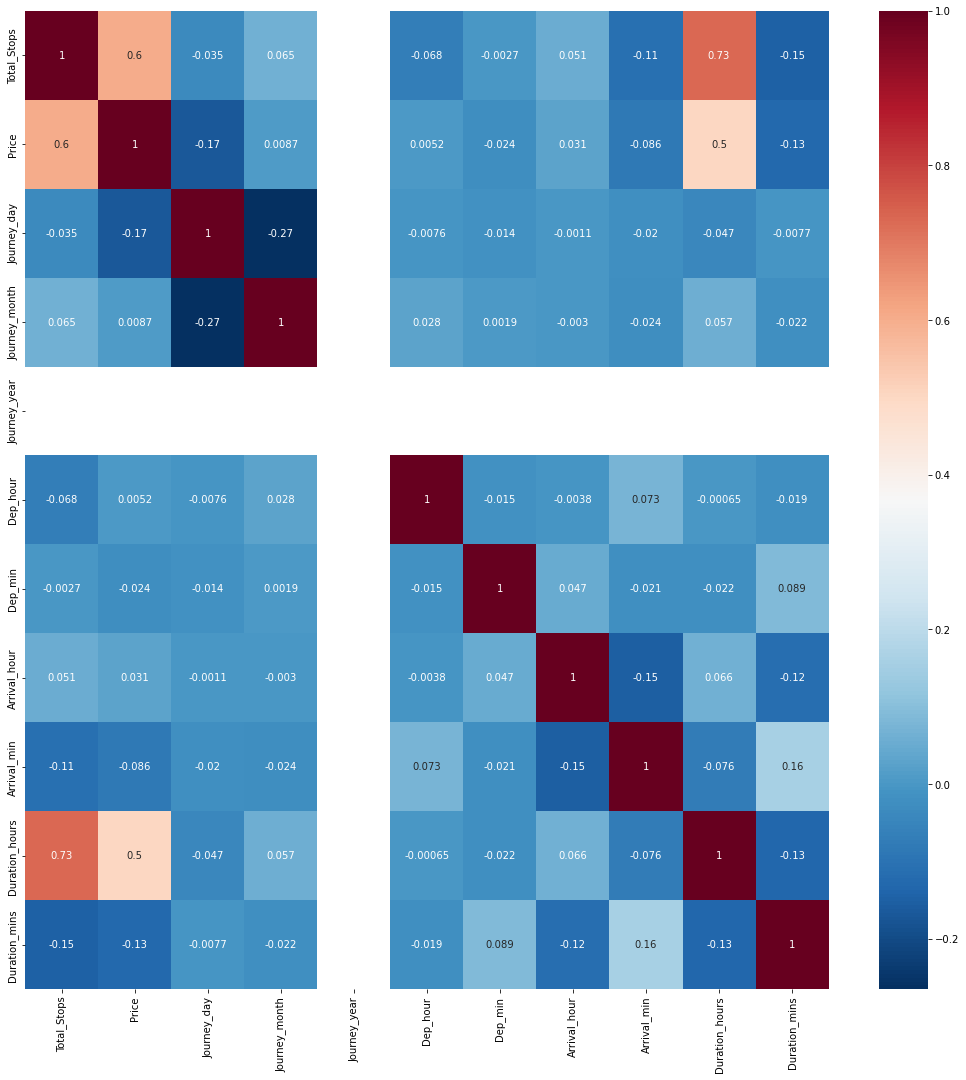

In [68]:
#Finding the correleation bw Independent and dependent Attribute

plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap="RdBu_r")
plt.show()

In [71]:
#Important Feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [72]:
print(selection.feature_importances_)

[2.02139893e-01 8.15479935e-02 3.98936393e-02 0.00000000e+00
 2.55327984e-02 2.13105474e-02 2.98362031e-02 2.02279834e-02
 1.51834309e-01 1.75850043e-02 1.06288925e-02 1.92876918e-03
 1.44598989e-02 1.32164951e-01 6.78839690e-02 2.11935146e-02
 9.92372972e-04 3.29471471e-03 1.06628380e-04 4.98226615e-03
 1.31141504e-04 6.93924308e-04 1.31263723e-02 4.93898137e-03
 5.05967020e-03 7.74606024e-03 1.60922947e-02 8.51066522e-03
 5.30623796e-04 2.36054736e-02 1.31813056e-02 1.48806276e-03
 8.64641381e-03 4.06932789e-02 4.45081930e-03 3.56056450e-03]


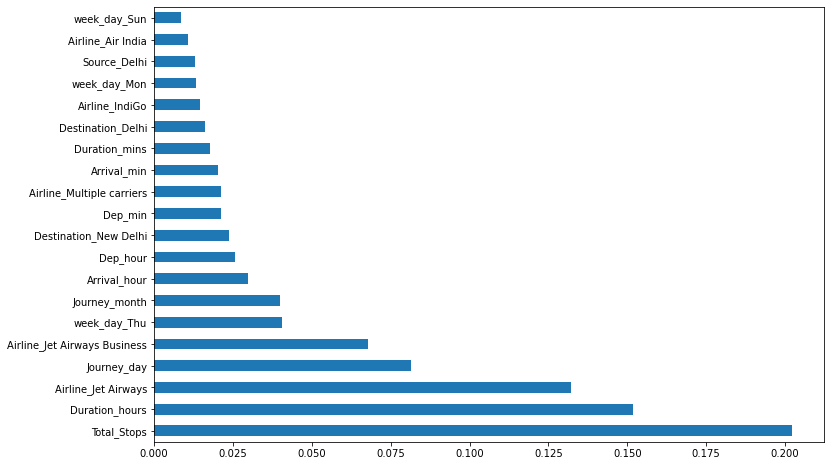

In [74]:
#plot graph of feature importance for better visualization

plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_,index = X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using Random Forest

Split dataset into train and test set in order to predict w.r.t X_test

If needed do scaling of data

    Scaling is not done in Random Forest
    
Import model

Fit the data

Predict w.r.t X_test

In regression check RSME Score

plot graph

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [77]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [80]:
y_pred = reg_rf.predict(X_test)

In [78]:
reg_rf.score(X_train,y_train)

0.9531692167137167

In [79]:
reg_rf.score(X_test,y_test)

0.8125034288455244

<AxesSubplot:xlabel='Price', ylabel='Density'>

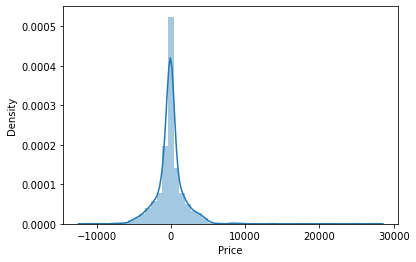

In [81]:
sns.distplot(y_test - y_pred)

In [83]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RSME:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1174.4524826339982
MSE: 3909355.3284808965
RSME: 1977.2089744083441


In [84]:
#RMSE/(max(DV)-min(DV))
1977.2089/(max(y)-min(y))

0.02542935835273237

In [85]:
metrics.r2_score(y_test,y_pred)

0.8125034288455244

# Hyperparameter Tuning

Choose following method for hyperparameter tuning

    1.RandomizedSearchCV -> Fast
    
    2.GridSearchCV
    
Assign hyperparameter in form of dictionary 

Fit the model

Check the best parameter and best score

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [97]:
#RandomizedSearchCV

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100,stop = 1200,num = 12)]

#NUmber of feature to consider at every split
max_features = ['auto','sqrt']

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num = 6)]

#Minimum number of sample required to split a node
min_samples_split = [2,5,10,15,100]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10,15]

In [98]:
#Create the random grid

random_grid = {
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf
}

In [99]:
#Random search of parameter, using 5 fold cross validation
#search across 100 different combinations
rf_random = RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv = 5,verbose=2,random_state=42,n_jobs =1)

In [100]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=  24.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=  25.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=  25.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=  24.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=  24.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   4.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   4.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [101]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [102]:
prediction = rf_random.predict(X_test)

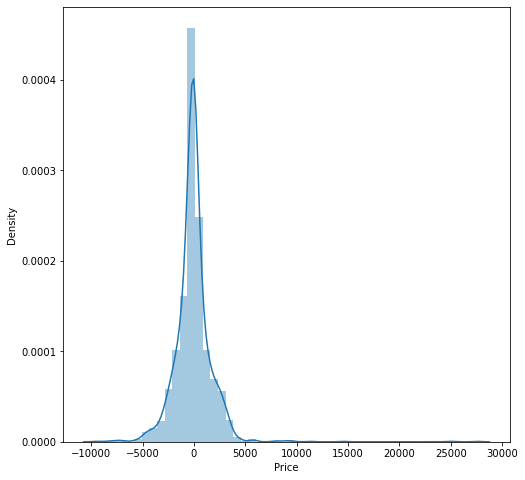

In [103]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

In [104]:
print("MAE:",metrics.mean_absolute_error(y_test,prediction))
print("MSE:",metrics.mean_squared_error(y_test,prediction))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 1118.6264067903287
MSE: 3405975.407419798
RMSE: 1845.5284900049087


In [110]:
import pickle 
#open a file,where you want to store the data

file = open('flight_rf.pkl','wb')

#dump information to that file
pickle.dump(rf_random,file)

In [111]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [112]:
y_prediction = forest.predict(X_test)

In [113]:
metrics.r2_score(y_test,y_prediction)

0.8366460306958509